Matthew Dacre 2091295

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split

## Importing the dataset

The data set that will be used to train the linear regression model will be a collection of data about fish. This model will be considering the height and width of a fish, in order to predict the weight of the fish.

Source: https://www.kaggle.com/datasets/aungpyaeap/fish-market

In [2]:
'''
Importing the fields into a pandas dataframe
'''

fields = ["Weight","Height","Width"]

df = pd.read_csv('Fish.csv', usecols=fields)

df.head()

,Weight,Height,Width
0,242.0,11.5200,4.0200
1,290.0,12.4800,4.3056
2,340.0,12.3778,4.6961
3,363.0,12.7300,4.4555
4,430.0,12.4440,5.1340


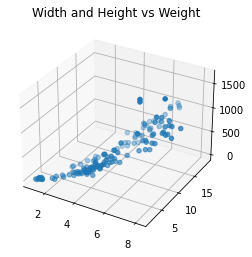

In [3]:
'''
Visualising the data
'''

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("Width and Height vs Weight")
ax.scatter3D(df['Width'], df['Height'], df['Weight'])

## Initialising the data

This function converts the pandas dataframe into a numpy array, and adds a leading column of 1s to the features array, to act as the basis. The thetas are initialised to 1s. It also splits the data set into a training and testing set

In [4]:
#Processing data, adding column of 1s to the feature dataset for the basis, and initialising theta to 1s
def initData():
    y = np.array(df['Weight'])
    x = np.array(df[["Height","Width"]])
    x = np.c_[np.ones(x.shape[0]), x]
    theta = np.ones(x.shape[1])
    x_train, x_test, y_train, y_test = train_test_split(x, y)
    return theta, x_train, x_test, y_train, y_test

Initial training error:  1861290828.3504019
Final training error:  196137746.30978635
Change in training error:  -1665153082.0406156
Time taken in seconds:  32.002501249313354
Final testing error:  20716581.352393754


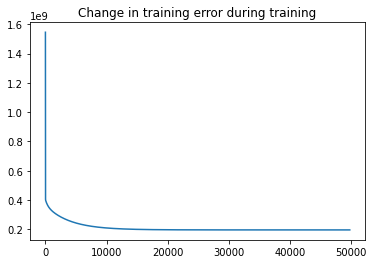

In [5]:
'''
Naive implementation of gradient descent, without any optimisations. 

h(theta, xi) returns the value of h_{theta}(x)

error(theta, x, y) returns the value of the error with the given theta

gradient(theta, x, y, alpha=0.01, ep=0.01) returns the parameters theta after performing stochastic gradient descent until ||theta_{new} - theta_{old}||2 < ep

'''

def h(theta, xi):
    return xi.T.dot(theta)

def error(theta, x, y):
    #Loops thorugh each value and calculates the sum of squares error for a give theta, x, y
    sum = 0
    for i in range(len(x)):
        sum += (h(theta, x[i]) - y[i])**2
    return sum*(1/2*len(x))

def gradient(theta, x, y, alpha=0.01, ep=0.01):
    thetaOld = np.array([100]*len(theta))
    jAll = []
    #Runs until theta is not changing more than ep
    while abs(np.linalg.norm(theta-thetaOld)) > ep:
        thetaOld = theta
        for i, data in enumerate(x):
            theta = theta - ((alpha/len(x))*(h(theta, data) - y[i]))*data

        jAll.append(error(theta, x, y))    

    return theta, jAll

#Loading the initial data
theta, x_train, x_test, y_train, y_test = initData()

#Initial error of the data set:
errorInit = error(theta, x_train, y_train)
print("Initial training error: ", str(errorInit))

start = time.time()

#Performing gradient descent with alpha, epsilon = 0.001, 0.0001
t, jAll = gradient(theta, x_train, y_train, 0.001, 0.0001)

end = time.time()

#Final error of the data set
errorFinal = error(t, x_train, y_train)
print("Final training error: ", str(errorFinal))

#Differences in the error
print("Change in training error: ", (errorFinal - errorInit))
print("Time taken in seconds: ", end-start)

#Calculating and printing testing error
print("Final testing error: ", error(t, x_test, y_test))

plt.title("Change in training error during training")
plt.plot(jAll)

## Comparing Learning Rates

As shown below, the best performing learning rate was when $\alpha=0.01 \; or \; \alpha=0.1$. When $\alpha=0.1$, it took much fewer epochs for the algorithm to converge

Performg GD for alpha= 0.1
Performg GD for alpha= 0.01
Performg GD for alpha= 0.001
Performg GD for alpha= 0.0001
For an  alpha=0.1, the training took 544 epochs, with a final testing error of 9803064.162230022
For an  alpha=0.01, the training took 3440 epochs, with a final testing error of 10699940.713406187
For an  alpha=0.001, the training took 14555 epochs, with a final testing error of 11702944.351108313
For an  alpha=0.0001, the training took 451 epochs, with a final testing error of 41413959.696596384


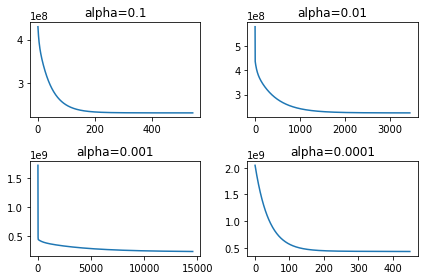

In [49]:
'''
Exploring the effect of different learning rates, using the same initial values of theta, and the same epsilon to ensure similar accuracy is acheived between each trials
'''

fig, axs = plt.subplots(nrows=2, ncols=2)

theta, x_train, x_test, y_train, y_test = initData()
alphaVals = [0.1, 0.01, 0.001, 0.0001]
jAll = []
tAll = []
jTestAll = []
# Looping through each value of alpha in alphaVals, and storing the final theta values, as well as the error during training
for al in alphaVals:
    print("Performg GD for alpha=", al)
    t, j = gradient(theta, x_train, y_train, al, ep=0.01)
    tAll.append(t)
    jAll.append(j)
    jTestAll.append(error(t, x_test, y_test))

axs[0, 0].plot(jAll[0])
axs[0, 0].set_title("alpha=0.1")
axs[0, 1].plot(jAll[1])
axs[0, 1].set_title("alpha=0.01")
axs[1, 0].plot(jAll[2])
axs[1, 0].set_title("alpha=0.001")
axs[1, 1].plot(jAll[3])
axs[1,1].set_title("alpha=0.0001")

for i in range(len(jAll)):
    print(f"For an  alpha={alphaVals[i]}, the training took {len(jAll[i])} epochs, with a final testing error of {jTestAll[i]}")

fig.tight_layout()
plt.show()

## Gradient Descent with feature scaling

The algorithm took signifiactnly shorter than without feature scaling, reducing the time taken by an order of magnitude. It also had a significantly lower error after tarining.

Comparing the plots of the data before and after scaling, the increase in performance can be explained by the fact that the data seems to be clustered much closer together, meaning linear regression can find the best fit much quicker

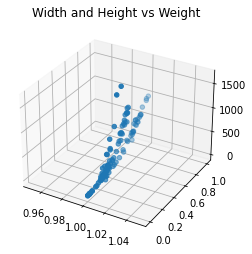

In [50]:
'''
Plotting the scaled data
'''

theta, x_train, x_test, y_train, y_test = initData()


# Scaling the training and testing data using min-max scaling

yScaledScl = (y_train - np.amin(y_train, axis=0))/(np.amax(y_train, axis=0) - np.amin(y_train, axis=0))
yScaledSclTest = (y_test - np.amin(y_test, axis=0))/(np.amax(y_test, axis=0) - np.amin(y_test, axis=0))
xScaledScl = x_train
for i in range(1, len(x_train[0])):
    col = x_train[:, i]
    xScaledScl[:, i] = (col - np.amin(col))/(np.amax(col) - np.amin(col))

xScaledSclTest = x_test
for i in range(1, len(x_test[0])):
    col = x_test[:, i]
    xScaledSclTest[:, i] = (col - np.amin(col))/(np.amax(col) - np.amin(col))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("Width and Height vs Weight")
ax.scatter3D(x_train[:,0], x_train[:,1], y_train)


Initial training error:  19481.07956402288
Final training error:  153.40581069050086
Change in training error:  -19327.67375333238
Time taken in seconds:  1.349001407623291
Final testing error:  21.687470672735078


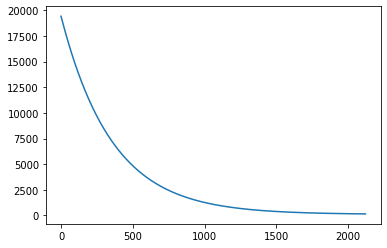

In [51]:
'''
Implementing gradient descent with feature scaling, using the minimum value and range
'''

def h(theta, xi):
    return xi.T.dot(theta)

def error(theta, x, y):
    sum = 0
    for i in range(len(x)):
        sum += (h(theta, x[i]) - y[i])**2
    return sum*(1/2*len(x))

def gradient(theta, x, y, alpha=0.01, ep=0.01):
    thetaOld = np.array([100]*len(theta))
    jAll = []
    while abs(np.linalg.norm(theta-thetaOld)) > ep:
        thetaOld = theta
        for i, data in enumerate(x):
            theta = theta - ((alpha/len(x))*(h(theta, data) - y[i]))*data

        jAll.append(error(theta, x, y))    

    return theta, jAll

theta, x_train, x_test, y_train, y_test = initData()

yScaledScl = (y_train - np.amin(y_train, axis=0))/(np.amax(y_train, axis=0) - np.amin(y_train, axis=0))
yScaledSclTest = (y_test - np.amin(y_test, axis=0))/(np.amax(y_test, axis=0) - np.amin(y_test, axis=0))
xScaledScl = x_train
for i in range(1, len(x_train[0])):
    col = x_train[:, i]
    xScaledScl[:, i] = (col - np.amin(col))/(np.amax(col) - np.amin(col))

xScaledSclTest = x_test
for i in range(1, len(x_test[0])):
    col = x_test[:, i]
    xScaledSclTest[:, i] = (col - np.amin(col))/(np.amax(col) - np.amin(col))


#Gradient using scaled features:
#Initial error of the data set:
errorInit = error(theta, xScaledScl, yScaledScl)
print("Initial training error: ", str(errorInit))

start = time.time()

#Performing gradient descent
t, jAll = gradient(theta, xScaledScl, yScaledScl, 0.001, 0.0001)

end = time.time()

#Final error of the data set
errorFinal = error(t, xScaledScl, yScaledScl)
print("Final training error: ", str(errorFinal))

#Differences in the error
print("Change in training error: ", (errorFinal - errorInit))
print("Time taken in seconds: ", end-start)

print("Final testing error: ", error(t, xScaledSclTest, yScaledSclTest))


plt.plot(jAll)

## Gradient Descent with feature standardization

The algorithm took significantly shorter than without feature standardization, reducing the time taken by an order of magnitude. It also had a significantly lower error after tarining. It performed slighlty worse than the min-max scaling performed above

Initial training error:  20761.255134971045
Final training error:  152.513604668015
Change in training error:  -20608.74153030303
Time taken in seconds:  1.3119990825653076
Final testing error:  15.793545831161747


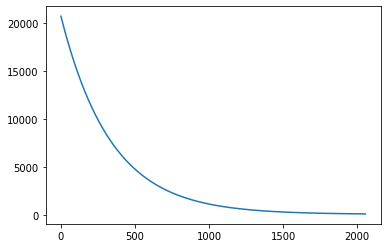

In [52]:
'''
Implementing gradient descent with feature standardization, using the mean and standard deviation
'''

def h(theta, xi):
    return xi.T.dot(theta)

def error(theta, x, y):
    sum = 0
    for i in range(len(x)):
        sum += (h(theta, x[i]) - y[i])**2
    return sum*(1/2*len(x))

def gradient(theta, x, y, alpha=0.01, ep=0.01):
    thetaOld = np.array([100]*len(theta))
    jAll = []
    while abs(np.linalg.norm(theta-thetaOld)) > ep:
        thetaOld = theta
        for i, data in enumerate(x):
            theta = theta - ((alpha/len(x))*(h(theta, data) - y[i]))*data

        jAll.append(error(theta, x, y))    

    return theta, jAll

theta, x_train, x_test, y_train, y_test = initData()

#Standardizing the data before running GD

yScaledStd = (y_train - np.amin(y_train, axis=0))/(np.amax(y_train, axis=0) - np.amin(y_train, axis=0))
yScaledStdTest = (y_test - np.amin(y_test, axis=0))/(np.amax(y_test, axis=0) - np.amin(y_test, axis=0))
xScaledStd = x_train
for i in range(1, len(x_train[0])):
    col = x_train[:, i]
    xScaledStd[:, i] = (col - np.amin(col))/(np.amax(col) - np.amin(col))

xScaledStdTest = x_test
for i in range(1, len(x_test[0])):
    col = x_test[:, i]
    xScaledStdTest[:, i] = (col - np.amin(col))/(np.amax(col) - np.amin(col))


#Initial error of the data set:
errorInit = error(theta, xScaledStd, yScaledStd)
print("Initial training error: ", str(errorInit))

start = time.time()

#Performing gradient descent
t, jAll = gradient(theta, xScaledStd, yScaledStd, 0.001, 0.0001)

end = time.time()

#Final error of the data set
errorFinal = error(t, xScaledStd, yScaledStd)
print("Final training error: ", str(errorFinal))

#Differences in the error
print("Change in training error: ", (errorFinal - errorInit))
print("Time taken in seconds: ", end-start)
print("Final testing error: ", error(t, xScaledStdTest, yScaledStdTest))


plt.plot(jAll)

## Gradient Descent using Regularization

The regularization had a similar improvement over the naieve gradient descent as the feature scaling/standardization, with a similar speedup in training but not error reduction.

Initial training error:  2022556846.8903477
Final training error:  260400440.89309147
Change in training error:  -1762156405.9972563
Time taken in seconds:  3.1509997844696045
Final testing error:  15566266.338106446


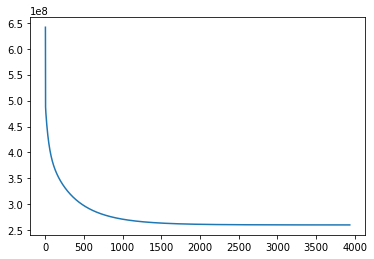

In [53]:
'''
Gradient descent using regularization
'''

def h(theta, xi):
    return xi.T.dot(theta)

def error(theta, x, y):
    sum = 0
    for i in range(len(x)):
        sum += (h(theta, x[i]) - y[i])**2
    return sum*(1/2*len(x))

def gradientReg(theta, x, y, alpha=0.01, ep=0.01, lmda=0.1):
    #Lambda is the regularization term used in GD
    thetaOld = np.array([100]*len(theta))
    jAll = []
    n = len(x)
    while abs(np.linalg.norm(theta-thetaOld)) > ep:
        thetaOld = theta
        for i, data in enumerate(x):
            theta = theta*(1-alpha*(lmda/n)) - ((alpha/n)*(h(theta, data) - y[i]))*data

        jAll.append(error(theta, x, y))    

    return theta, jAll

theta, x_train, x_test, y_train, y_test = initData()

#Initial error of the data set:
errorInit = error(theta, x_train, y_train)
print("Initial training error: ", str(errorInit))

start = time.time()

#Performing gradient descent
t, jAll = gradientReg(theta, x_train, y_train, 0.01, 0.0001)

end = time.time()

#Final error of the data set
errorFinal = error(t, x_train, y_train)
print("Final training error: ", str(errorFinal))

#Differences in the error
print("Change in training error: ", (errorFinal - errorInit))
print("Time taken in seconds: ", end-start)
print("Final testing error: ", error(t, x_test, y_test))


plt.plot(jAll)